# Ensemble Learning

In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.[1][2][3] Unlike a statistical ensemble in statistical mechanics, which is usually infinite, a machine learning ensemble consists of only a concrete finite set of alternative models, but typically allows for much more flexible structure to exist among those alternatives.


## Voting Classifiers


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

df = pd.read_csv('/Users/yihanhong/Desktop/577/dataset/lgrg_heart.csv')
df.dropna(axis=0, inplace=True)
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [2]:
from sklearn.model_selection import train_test_split
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)
# scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [3]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)
voting_clf = VotingClassifier(
        estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
   #     voting='hard'
     voting = 'soft'
    )
voting_clf.fit(X_train, y_train)

# Let’s look at each classifier’s accuracy on the test set:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8468550592525068
RandomForestClassifier 0.8422971741112124
SVC 0.837739288969918
VotingClassifier 0.8395624430264357


All these three models have good performance, while the ensemble model voting classifier seems doesn't perform better than them.

Plot the confusion matrice of three models.

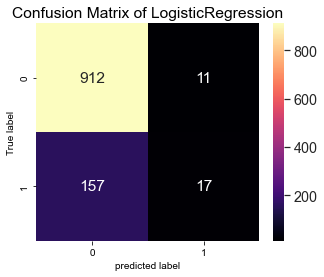

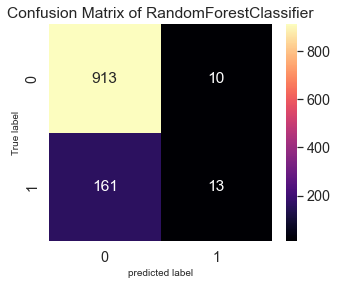

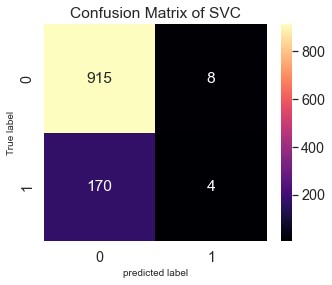

In [4]:
from sklearn import metrics
import seaborn as sns
for clf in [log_clf, rnd_clf, svm_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    matrix_df = pd.DataFrame(confusion_matrix)

    plt.figure(figsize=(5,4))
    ax=plt.axes()
    sns.set(font_scale=1.3)

    sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')
    ax.set_title(f'Confusion Matrix of {clf.__class__.__name__}')
    ax.set_xlabel('predicted label', fontsize=10)
    ax.set_ylabel('True label', fontsize=10)
    plt.show()

Ensemble Learning may not perform well compared with base models. This may comes from Poor quality of the base models. The performance of the ensemble is highly dependent on the quality of the base models. If the base models have high bias or low variance, the ensemble may not improve the accuracy of the predictions.

## Bagging and Pasting

Another approach is to use the same training algorithm for every predictor, but to train them on different random subsets of the training set. When sampling is performed with replacement, this method is called bagging. When sampling is performed without replacement, it is called pasting.

Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predictions of all predictors. 

Try Bootstrap Aggregating with Decision Trees

In [5]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=500,
        max_samples=100, bootstrap=True, n_jobs=-1
    )
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [6]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
accuracy_score(y_test, y_pred)

0.8404740200546946

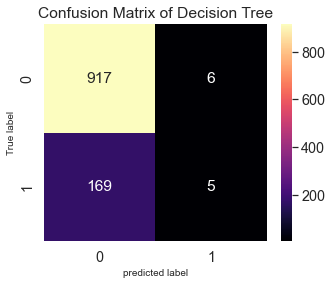

In [8]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(5,4))
ax=plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')
ax.set_title('Confusion Matrix of Decision Tree')
ax.set_xlabel('predicted label', fontsize=10)
ax.set_ylabel('True label', fontsize=10)
plt.show()

A certain type of data is always misclassified.

## Random Forest

a Random Forest is an ensemble of Decision Trees, generally trained via the bagging method 

In [9]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)


In [10]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
accuracy_score(y_test, y_pred_rf)

0.8413855970829535

The Random Forest model has the same performance as the Bootstrap Aggregating with Decision Trees model. Since the only difference is that Random Forest selects features from a subset of features, it shows that this task is relatively simple that it's not too hard to predict the labels, so feature bagging is not necessary.